# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [134]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0:  1.5173e+00  3.7821e+01  1e+02  2e+00  3e+01
 1:  1.3803e+01  9.6371e+00  3e+01  5e-01  7e+00
 2:  2.1717e+01  1.7415e+01  3e+01  4e-01  6e+00
 3:  3.9769e+01  3.8469e+01  8e+00  7e-02  1e+00
 4:  4.3534e+01  4.3375e+01  5e-01  4e-03  6e-02
 5:  4.3726e+01  4.3699e+01  3e-02  8e-06  1e-04
 6:  4.3723e+01  4.3721e+01  1e-03  4e-07  5e-06
 7:  4.3723e+01  4.3723e+01  1e-05  4e-09  5e-08
Optimal solution found.
[ 6.83e+00]
[ 6.38e+00]
[-5.43e+00]



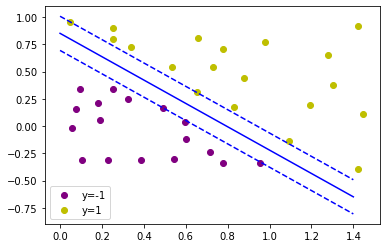

In [135]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
Q=matrix(np.array([[1,0,0],[0,1,0],[0,0,0]]),tc='d')
p=matrix(np.array([[0],[0],[0]]),tc='d')
G1=-np.multiply(y,x[:, 0])
G2=-np.multiply(y,x[:, 1])
G3=-y
G=matrix(np.column_stack((G1,G2,G3)),tc='d')
n=len(data)
h=matrix(-np.ones((n, 1)),tc='d')
Opti=cvxopt.solvers.qp(Q,p,G,h)
w=Opti['x']
print(w)
#Decision Boundary
plt.scatter(x[:,0][y==-1],x[:,1][y==-1],label="y=-1",c='purple')
plt.scatter(x[:,0][y==1],x[:,1][y==1],label="y=1",c='y')
plt.legend()
points=np.linspace(0,1.4,141)
hyperplane=(w[0]*points+w[2])/(-1*w[1])
hyperplane1=(w[0]*points+w[2]+1)/(-1*w[1])
hyperplane2=(w[0]*points+w[2]-1)/(-1*w[1])
plt.plot(points,hyperplane,c='b')
plt.plot(points,hyperplane1,linestyle='--',c='b')
plt.plot(points,hyperplane2,linestyle='--',c='b')

## b) and c) : Linearly Non-separable Dataset

In [136]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x1 = data[:, 0:2]
y1 = data[:, 2]
n=len(data)
C=0.05
X=np.concatenate((x1,np.ones(n).reshape(n,1)),axis=1)
Y=y1.reshape(n,1)*1

def SVM(C):
    Q1=np.array([[1,0,0],[0,1,0],[0,0,0]])
    Q2=np.zeros((3,n),  dtype=int)
    Q3=np.zeros((n,n+3),  dtype=int)
    Q11=np.column_stack((Q1,Q2))
    Q=matrix(np.vstack((Q11,Q3)),tc='d') 
    
    p=np.concatenate((np.zeros(3),C*np.ones(n))).reshape(n+3,1)
    p=matrix(p,tc='d')
    
    G1=-1*X*Y
    G2=-1*np.eye(n)
    G3=np.zeros((n,3))                
    G11=np.concatenate((G1,G3))
    G21=np.concatenate((G2,G2))
    G=np.concatenate((G11,G21),axis=1) 
    G=matrix(G,tc='d')
    
    h1=-1*np.ones(n)
    h2=np.zeros(n)
    h=matrix(np.concatenate((h1,h2)).reshape(2*n,1))
    
    Opti=cvxopt.solvers.qp(Q,p,G,h)
    w=np.array(Opti['x'])
    fig=plt.figure()
    plt.scatter(x1[:,0][y1==-1],x1[:,1][y1==-1],label='y=-1',c='purple',figure=fig)
    plt.scatter(x1[:,0][y1==1],x1[:,1][y1==1],label="y=1",c='y',figure=fig)
    plt.legend()
    
    points=np.linspace(-7.5,10,1761)
    
    hyperplane=(w[0]*points+w[2])/(-1*w[1])
    hyperplane1=(w[0]*points+w[2]+1)/(-1*w[1])
    hyperplane2=(w[0]*points+w[2]-1)/(-1*w[1])
    
    plt.plot(points,hyperplane,c='b',figure=fig)
    plt.plot(points,hyperplane1,linestyle='--',c='b',figure=fig)
    plt.plot(points,hyperplane2,linestyle='--',c='b',figure=fig)

    plt.xlim(-10,10)
    plt.ylim(-10,10)
    return fig,Opti

     pcost       dcost       gap    pres   dres
 0: -6.1550e+00  1.3244e+02  7e+02  3e+00  1e+02
 1:  7.0364e+01 -3.3983e+01  1e+02  4e-01  1e+01
 2:  3.4800e+01  1.5359e+01  2e+01  3e-02  1e+00
 3:  2.4363e+01  2.0451e+01  4e+00  7e-03  3e-01
 4:  2.2970e+01  2.1610e+01  1e+00  2e-03  7e-02
 5:  2.2547e+01  2.2002e+01  6e-01  5e-04  2e-02
 6:  2.2344e+01  2.2139e+01  2e-01  9e-06  4e-04
 7:  2.2290e+01  2.2182e+01  1e-01  4e-06  2e-04
 8:  2.2242e+01  2.2225e+01  2e-02  4e-16  2e-14
 9:  2.2234e+01  2.2233e+01  2e-04  4e-16  2e-13
10:  2.2233e+01  2.2233e+01  2e-06  3e-16  3e-13
Optimal solution found.


(<Figure size 432x288 with 1 Axes>,
 {'x': <114x1 matrix, tc='d'>,
  'y': <0x1 matrix, tc='d'>,
  's': <222x1 matrix, tc='d'>,
  'z': <222x1 matrix, tc='d'>,
  'status': 'optimal',
  'gap': 2.111511783329169e-06,
  'relative gap': 9.497028354693519e-08,
  'primal objective': 22.23339664787368,
  'dual objective': 22.233394536361896,
  'primal infeasibility': 3.4981448889387195e-16,
  'dual infeasibility': 2.980168844070446e-13,
  'primal slack': 1.9040742456883476e-08,
  'dual slack': 2.2758612380476455e-09,
  'iterations': 10})

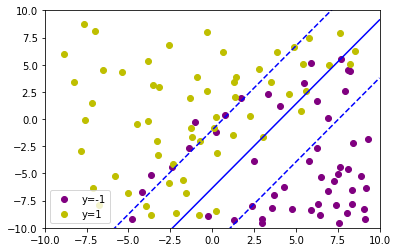

In [137]:
SVM(0.5)


### Explain your observations here:

     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-0

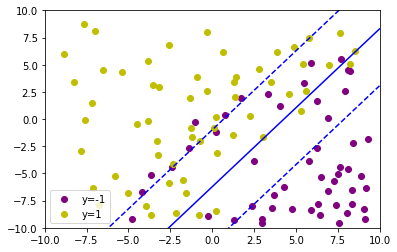

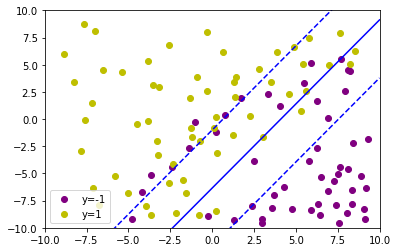

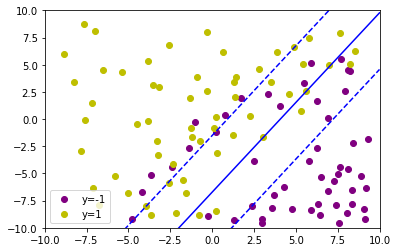

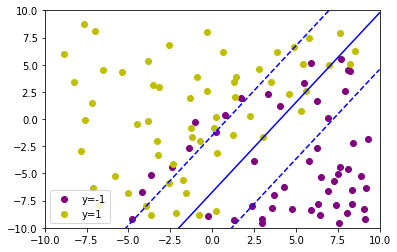

In [138]:
#C Use your code in b) to draw 4 plots, each corresponding to different values of
C = [0.1, 1, 100, 1000000]
for c in C:
    SVM(c)
    

# Discussion your observations of the decision margins.
On plotting all the decision boundaries in a single plot as shown in the below image we can see that the slope of the decision boundaries vary with the variation in C. The tilt is observed in the anti-clockwise direction with higher value of C.As we increase the values of C, the boundary tries to fit the data even more correctly and avoid  misclassification.

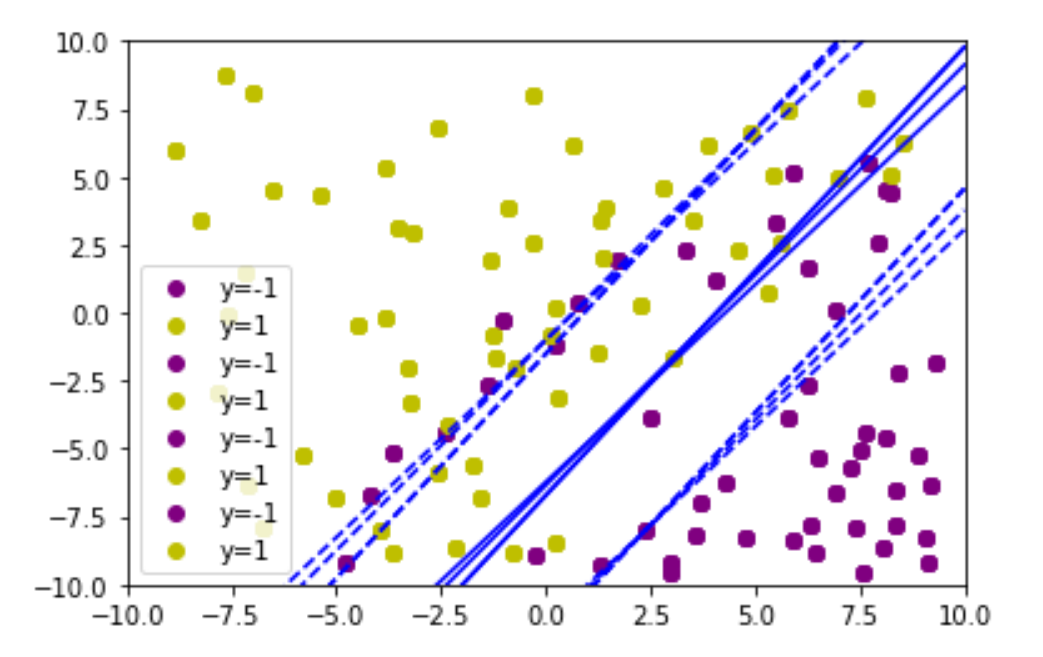

## d): SVM Kernels

Case 1: This case matches with Figure 4 . For smaller values of C, SVM can misclassify the data.

Case 2: This case matches with Figure 3. For larger values of C, SVM tries to fit the data more correctly, the plot has clear classification boundary between 2 classes.

Case 3: This case has a polynomial kernel with degree 2 and has equation similar to an ellipse or hyperbola. This case is best explained by Figure 5

Case 4: In this case, gamma value is 5. Higher the gamma value higher chances of overfitting. This case is clearly explained by figure 6.

Case 5: This case has lower gamma value. This allows some misclassification compared to case 4. Figure 1 represents this case.